# Aapa-mire GIS dataset



## Coordinate systems

Sentinelhub does not support Finnish national system ETRS89 / TM35FIN(E,N)(EPSG:3067). For this study we have selected WGS 84 / UTM zone 35N (EPSG:32635) as the default crs.

NOTE: Pseudo-Mercator (EPSG:3857) should not be used in the northern latitudes as it distorts the dimensions and rectangular grids grow unneccessarily large.

## Identifier fields of polygon dataset

Batch Statistical API operates based on fields "id" ja "identifier". Result files will be named using field "id" and contents of the "identifier" field are included in the result data structure.

In this study the field "id" corresponds to mire-index (avsu_id) of the original dataset and "identifier" is constructed from linear index of the original dataset, combined with mire index as

## Polygon data format and exporting

Sentinelhub supports only geopackage. Batch Statistical API does not support data with z-coordinates and it must not be used when exporting data with QGIS. After export, usually VACUUM operation reduces the file size significantly

## Splitting the dataset for processing

Number of individual aapa mires based on their total area are 

| Total number | 11917 |
| :- | -: |
| Over 10 km2 | 43 |
| 1-10 km2 | 737 |
| 0.1-1 km2 | 5352 |
| Under 0.1 km2 | 5785 |

2 polygon datasets were created, one for <=1km2 polygons and another for the rest. Smaller polygons will be processed in 10m and larger in 20m spatial resolution to reduce the processing costs.



## Extended blouding boxes for cloud coverage computation

Available cloud flags in Sentinel Hub Sentinel-2 L2A data do not reliably detect cloud shadows. In most cases dark mire-surfaces were falsely flagged as cloud shadows and therefore the shadow flag can not be usein in this use-case.

To minimize the effect of cloud shadows, cloud coverage of each individual scene was computed for an extended boundingbox of each mire. The extended boundingboxes were defined with 500m buffers to east/west/north and 5500m to south. This way we include the clouds that potentially cast shadows over the area of interest in the cloud coverage.


In [17]:
import geopandas as gpd
from shapely.geometry import Polygon, box
import matplotlib.pyplot as plt
import os
import numpy
import geopandas as gpd
import contextily as cx
import aapamires
aapamires.setproxies()

In [3]:
# buffer widths in meters
full_buffer = 500
south_buffer = 5000
# Clone geopackage and replace polygon geometries with their boundingboxes
input_polygons = r"parcels/avo10ha_vkulkuiset_32635_shub.gpkg"
data = gpd.read_file(input_polygons)
data

,fid,Shape_Area,avsu_id,identifier,geometry
0,2370,12009.093267,1,2370_1,"MULTIPOLYGON (((530323.446 7772010.915, 530324..."
1,2376,132800.112870,3,2376_3,"MULTIPOLYGON (((535850.318 7770919.757, 535851..."
2,7294,24796.446019,4,7294_4,"MULTIPOLYGON (((532237.946 7771175.875, 532236..."
3,7295,60680.950499,5,7295_5,"MULTIPOLYGON (((535129.057 7770977.222, 535121..."
4,2346,676.567496,6,2346_6,"MULTIPOLYGON (((528196.814 7769253.898, 528196..."
...,...,...,...,...,...
11912,10082,89343.567980,17774,10082_17774,"MULTIPOLYGON (((377210.019 6982457.135, 377208..."
11913,8331,44845.839067,17775,8331_17775,"MULTIPOLYGON (((420450.191 6982226.965, 420444..."
11914,11890,275473.080996,17777,11890_17777,"MULTIPOLYGON (((605842.089 6981342.452, 605846..."
11915,8332,9496.856100,17778,8332_17778,"MULTIPOLYGON (((419972.511 6981727.060, 419972..."


In [2]:
polygons = []
for g in data['geometry']:
    B1 = box(*g.bounds).buffer(full_buffer)
    B2 = box(*tuple(numpy.subtract(B1.bounds, (0, south_buffer , 0, 0))))
    polygons.append(B2)

data['geometry'] = polygons
data.to_file(os.path.splitext(input_polygons)[0]+'_BoundingBoxes.gpkg', driver="GPKG")

## Import and visualize polygons data

Preprocessed parcel datasets are included in this repository

In [4]:
BB = gpd.read_file(r"parcels/avo10ha_vkulkuiset_32635_shub_BoundingBoxes.gpkg")
large = gpd.read_file(r"parcels/avo10ha_vkulkuiset_32635_shub_over1km2.gpkg")
small = gpd.read_file(r"parcels/avo10ha_vkulkuiset_32635_shub_under1km2.gpkg")
# Display
large

,fid,Shape_Area,avsu_id,identifier,geometry
0,2412,1.670867e+06,73,2412_73,"MULTIPOLYGON (((508485.040 7742822.870, 508478..."
1,2836,3.202955e+06,125,2836_125,"MULTIPOLYGON (((480238.522 7738917.616, 480237..."
2,4647,1.190976e+06,150,4647_150,"MULTIPOLYGON (((511328.917 7740897.194, 511328..."
3,2838,2.419741e+06,167,2838_167,"MULTIPOLYGON (((480744.523 7731628.079, 480745..."
4,2827,1.387585e+06,187,2827_187,"MULTIPOLYGON (((483381.204 7735491.960, 483381..."
...,...,...,...,...,...
775,1944,3.023759e+06,17673,1944_17673,"MULTIPOLYGON (((457718.186 7002324.283, 457718..."
776,970,4.803071e+06,17676,970_17676,"MULTIPOLYGON (((692336.960 6999009.592, 692335..."
777,9858,2.452639e+06,17687,9858_17687,"MULTIPOLYGON (((686599.591 7001324.959, 686598..."
778,5346,1.234453e+06,17747,5346_17747,"MULTIPOLYGON (((721943.730 6991274.959, 721941..."


## Visualize subset of regions

* Light blue = Extended boundingboxes for cloud coverage calculation
* Dark Blue  = Mires < 1km2
* Red        = Mires > 1km2

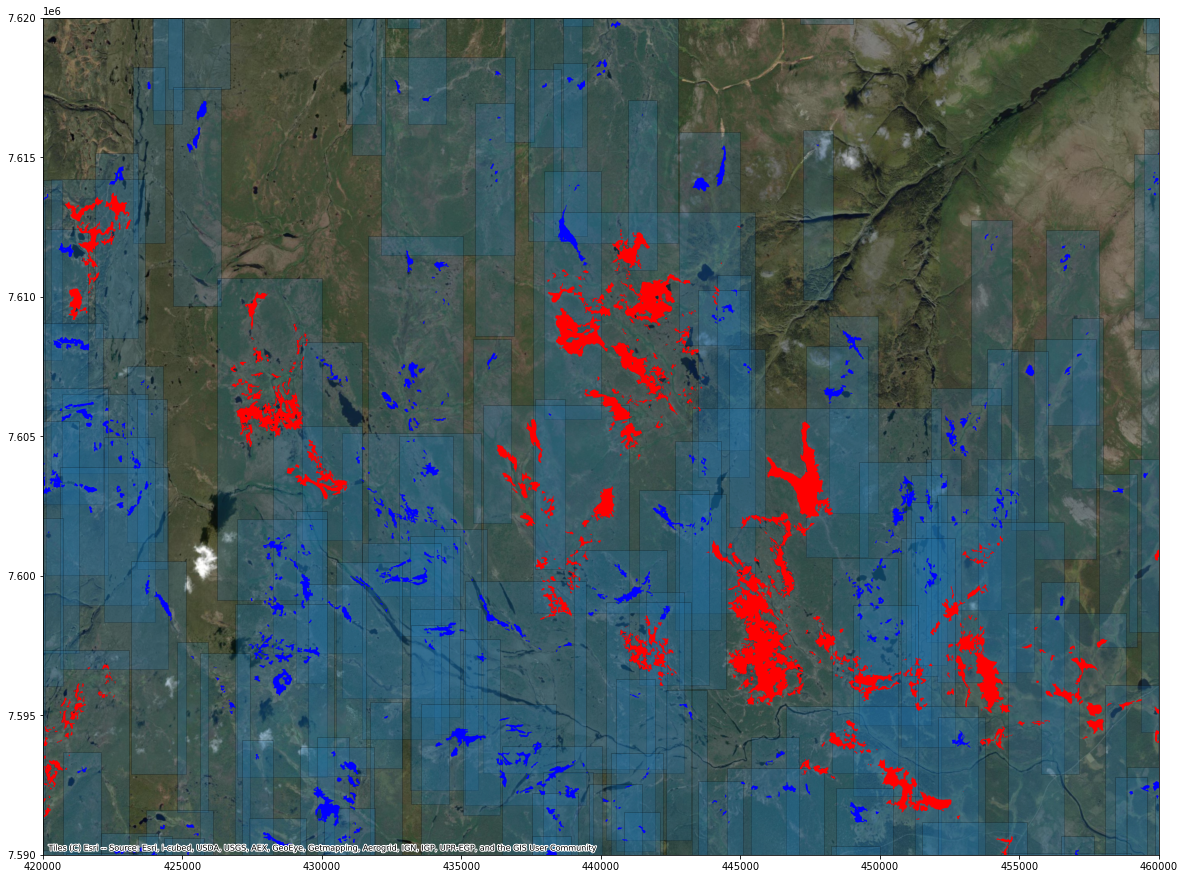

In [22]:
%matplotlib inline
minx, miny, maxx, maxy = 420000,7590000,460000,7620000
fig, ax = plt.subplots(figsize=(20,40))
BB.plot(alpha=0.2, edgecolor='k',ax=ax)
large.plot(ax=ax,facecolor='r')
small.plot(ax=ax,facecolor='b')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax, crs=large.crs, source=cx.providers.Esri.WorldImagery)